In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('placement.csv')

In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [6]:
df.shape

(100, 4)

In [7]:
df = df.iloc[:,1:]

In [8]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [9]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [10]:
import matplotlib.pyplot as plt


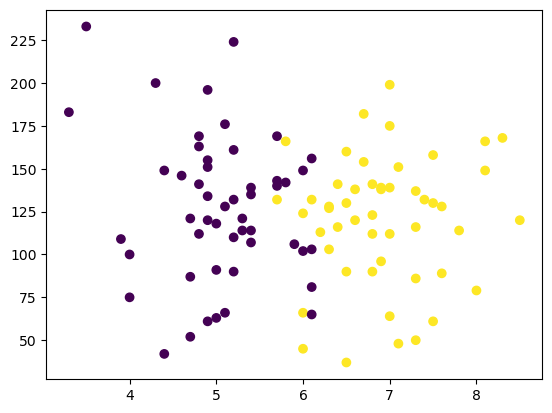

In [11]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [12]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [13]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [14]:
y.shape

(100,)

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [16]:
X_train

,cgpa,iq
58,8.0,79.0
14,6.1,103.0
54,6.4,141.0
9,5.1,66.0
16,5.2,224.0
...,...,...
76,4.9,155.0
57,6.5,130.0
85,5.8,166.0
68,4.0,75.0


In [17]:
y_train

58    1
14    0
54    1
9     0
16    0
     ..
76    0
57    1
85    1
68    0
13    1
Name: placement, Length: 90, dtype: int64

In [18]:
X_test

,cgpa,iq
24,4.7,121.0
95,4.3,200.0
42,7.6,89.0
44,7.5,61.0
91,7.5,158.0
87,5.7,132.0
66,6.9,96.0
20,6.6,120.0
90,7.3,86.0
5,7.1,48.0


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)

In [22]:
X_train

array([[ 1.84312632, -1.17527646],
       [ 0.14954974, -0.56164408],
       [ 0.41695657,  0.40994052],
       [-0.74180635, -1.50766066],
       [-0.65267074,  2.53208582],
       [-1.81143366, -0.40823598],
       [-0.65267074, -0.89402828],
       [-1.09834879, -1.86561288],
       [ 0.50609218, -0.89402828],
       [ 0.6843634 ,  1.45822916],
       [-0.56353513, -0.1014198 ],
       [ 0.32782096, -0.56164408],
       [-0.74180635,  0.07755631],
       [ 0.32782096,  0.0519883 ],
       [ 1.48658388,  0.07755631],
       [ 0.6843634 ,  0.74232472],
       [ 0.14954974, -1.53322868],
       [-2.34624731,  1.48379718],
       [ 0.06041414, -0.02471575],
       [-0.47439952, -0.28039591],
       [ 1.04090584,  0.66562068],
       [-2.1679761 ,  2.76219796],
       [-1.00921318,  0.40994052],
       [-0.92007757,  1.81618138],
       [ 1.93226193,  0.61448464],
       [ 0.06041414, -1.50766066],
       [ 0.77349901, -0.33153194],
       [-1.09834879, -0.97073233],
       [ 0.50609218,

In [23]:
X_test = scaler.transform(X_test)

In [24]:
X_test

array([[-1.09834879, -0.1014198 ],
       [-1.45489122,  1.91845345],
       [ 1.48658388, -0.9195963 ],
       [ 1.39744827, -1.63550074],
       [ 1.39744827,  0.84459679],
       [-0.20699269,  0.17982838],
       [ 0.86263462, -0.74062019],
       [ 0.59522779, -0.12698781],
       [ 1.21917706, -0.99630035],
       [ 1.04090584, -1.96788494]])

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
clf = LogisticRegression()

In [27]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_pred = clf.predict(X_test)

In [29]:
y_test

24    0
95    0
42    1
44    1
91    1
87    1
66    1
20    1
90    1
5     1
Name: placement, dtype: int64

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test,y_pred)

0.9

In [39]:
clf.predict([[7,8]])

array([1], dtype=int64)

In [33]:
pip install mlxtend


  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.4 MB 10.2 MB/s eta 0:00:01
   --------- ------------------------------ 0.3/1.4 MB 10.2 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.4 MB 3.5 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.4 MB 3.5 MB/s eta 0:00:01
   ------------------ --------------------- 0.7/1.4 MB 3.0 MB/s eta 0:00:01
   -------------------- ------------------- 0.7/1.4 MB 3.1 MB/s eta 0:00:01
   ----------------------- ---------------- 0.9/1.4 MB 2.7 MB/s eta 0:00:01
   ----------------------- ---------------- 0.9/1.4 MB 2.7 MB/s eta 0:00:01
   -------------------------- ------------- 1.0/1.4 MB 2.3 MB/s eta 0:00:01
   --------------------------------- ------ 1

In [34]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

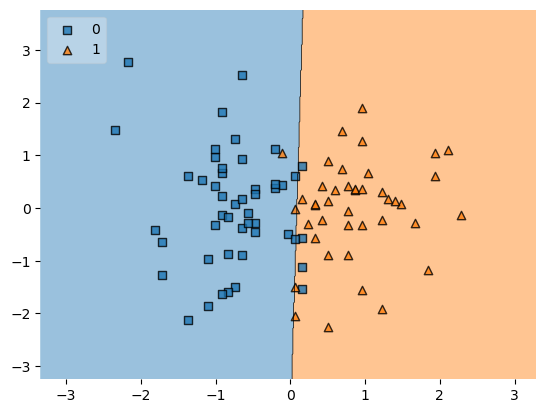

In [35]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [36]:
import pickle

In [37]:
pickle.dump(clf,open('model.pkl','wb'))